In [2]:
import TestImages: testimage

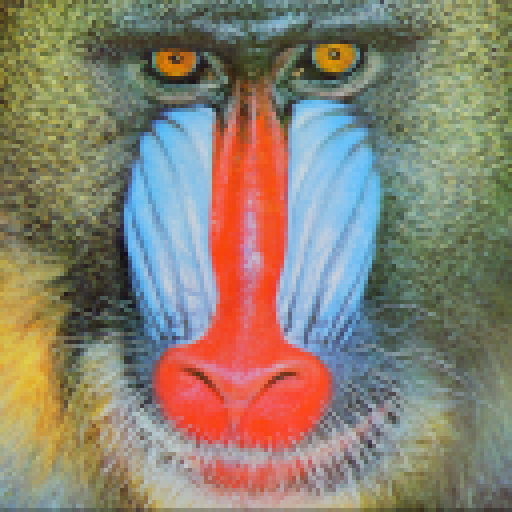

┌ Warning: Output swatches are reduced due to the large size (512×512).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\Fluid3\.julia\packages\Colors\gfDkX\src\display.jl:148


In [3]:
img = testimage("mandrill")

In [4]:
import ImageView: imshow

┌ Warning: You are using Gtk on Windows which is currently not recommended. Your REPL/IDE and anything depending on task switches will become sluggish and much slower (up to ~85x slower).
└ @ Gtk C:\Users\Fluid3\.julia\packages\Gtk\X7HfN\src\Gtk.jl:74
┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1278
┌ Warning: You are using Gtk on Windows which is currently not recommended. Your REPL/IDE and anything depending on task switches will become sluggish and much slower (up to ~85x slower).
└ @ Gtk C:\Users\Fluid3\.julia\packages\Gtk\X7HfN\src\Gtk.jl:74


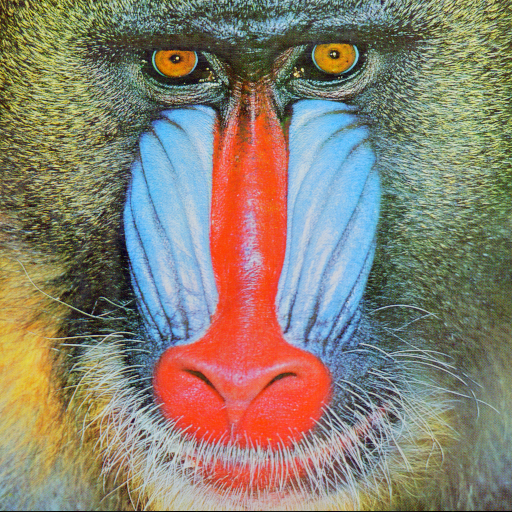

In [5]:
img

In [6]:
import ImageTransformations: imresize

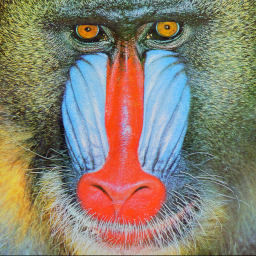

In [7]:
img_half = imresize(img, ratio = 1/2)

In [8]:
import Images: Gray

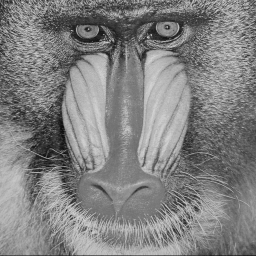

In [9]:
img_half = Gray.(img_half)

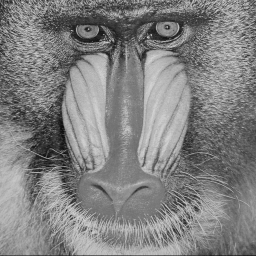

In [10]:
im1 = 1*img_half

In [11]:
import LinearAlgebra: transpose

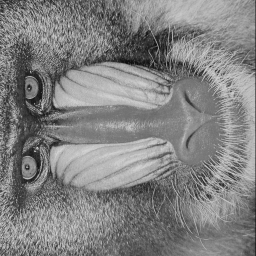

In [12]:
im1_t = transpose(im1)

In [13]:
# scale image so that all points brightness are between 0 and 1, and that full range is used
function normalize_image(im)
    im_res = im - minimum(im)
    return (1/maximum(im_res))*im_res
end

normalize_image (generic function with 1 method)

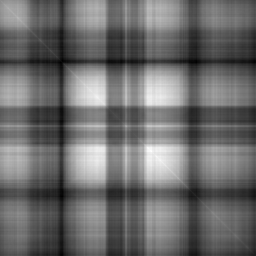

In [30]:
normalize_image(im1_t*im1)

In [31]:
# apply softmax to the columns of a matrix (in our case)
softmax(x; dims=1) = exp.(x) ./ sum(exp.(x), dims=dims)

softmax (generic function with 1 method)

In [32]:
# apply softmax to the rows of a matrix
tsoftmax(a) = transpose(softmax(transpose(a)))

tsoftmax (generic function with 1 method)

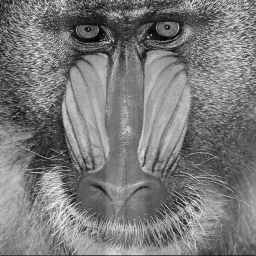

In [33]:
sm_im1 = normalize_image(Gray.(softmax(im1)))

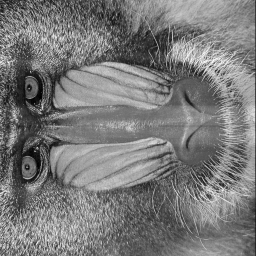

In [34]:
sm_im1_t = transpose(sm_im1)

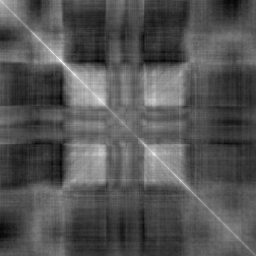

In [35]:
normalize_image(sm_im1_t*sm_im1)

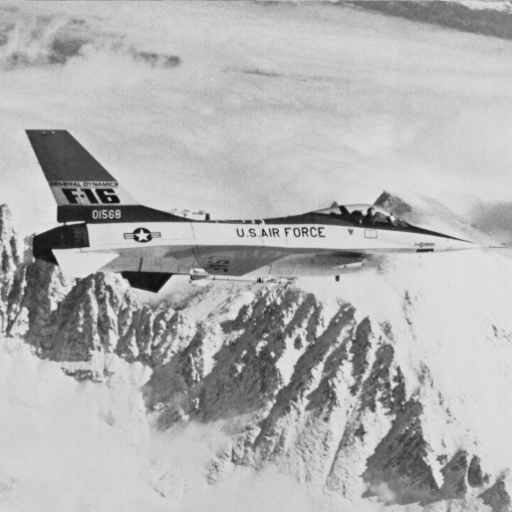

In [36]:
jmg = testimage("jetplane")

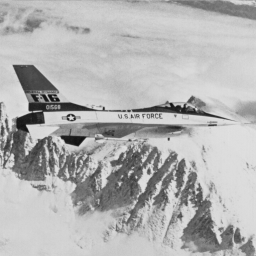

In [37]:
jmg_half = imresize(jmg, ratio = 1/2)

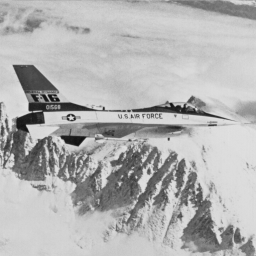

In [38]:
jm1=1*Gray.(jmg_half)

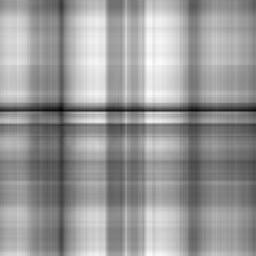

In [39]:
normalize_image(jm1*im1)

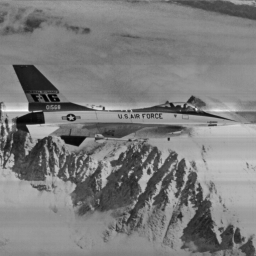

In [40]:
tsm_jm1 = normalize_image(Gray.(tsoftmax(jm1)))

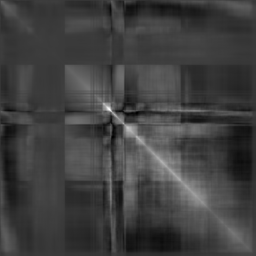

In [41]:
normalize_image(tsm_jm1*transpose(tsm_jm1))

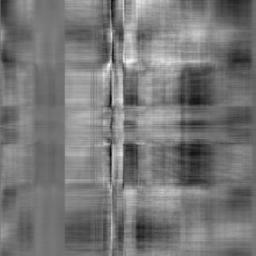

In [42]:
normalize_image(sm_im1_t*transpose(tsm_jm1))

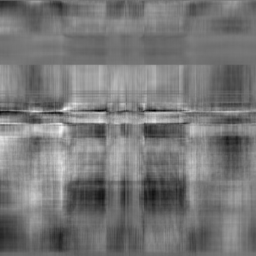

In [43]:
normalize_image(tsm_jm1*sm_im1)

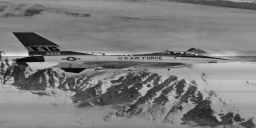

In [44]:
t1 = imresize(tsm_jm1, 128, 256)

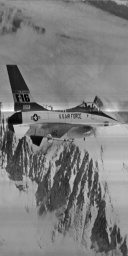

In [45]:
t2 = imresize(tsm_jm1, 256, 128)

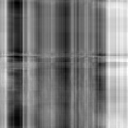

In [46]:
normalize_image(t1*t2)

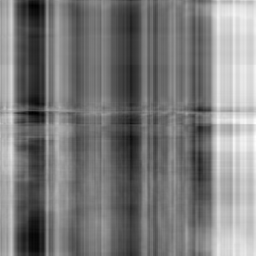

In [47]:
normalize_image(t2*t1)

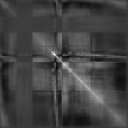

In [48]:
normalize_image(t1*transpose(t1))

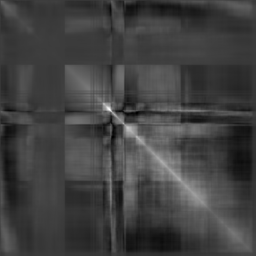

In [49]:
normalize_image(t2*transpose(t2))

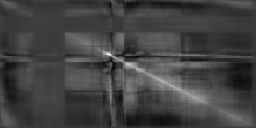

In [50]:
normalize_image(t1*transpose(tsm_jm1))

In [51]:
# testing that an attempt to multiply mismatched matrices would lead to errors
normalize_image(t2*transpose(tsm_jm1))

LoadError: DimensionMismatch("matrix A has dimensions (256,128), matrix B has dimensions (256,256)")